
<div style="background-color: #0000ff; color: #e6f7ff; padding: 20px; border-radius: 10px; text-align: center;">
  <h2>Prime Users Segmentation & Recommendation System</h2>
</div>



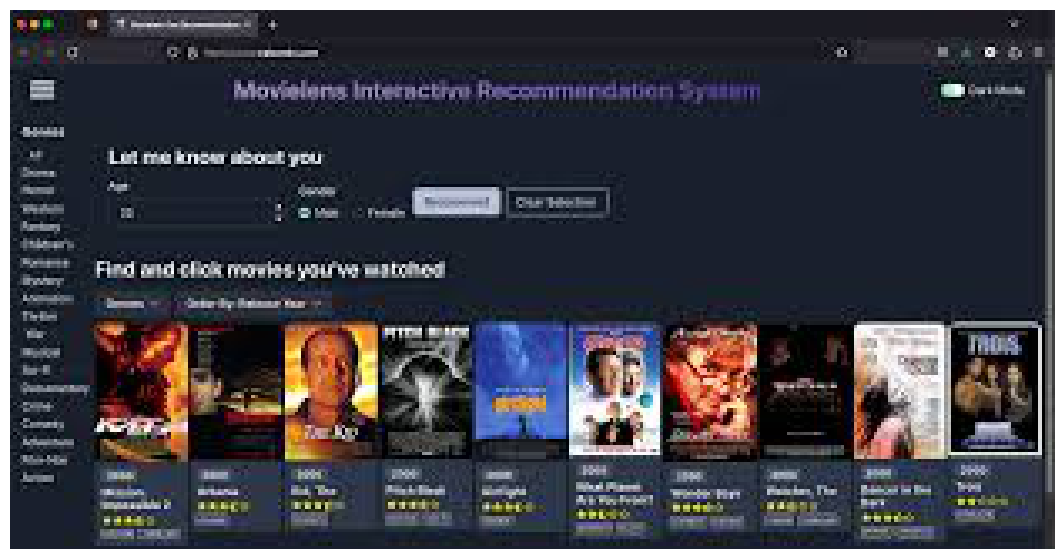

In [40]:
# Load the image using matplotlib.image.imread

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

image = mpimg.imread('images.jpeg')

# Display the image with adjusted dimensions
plt.figure(figsize=(15, 7))  # Adjust the width (breed) and height as needed
plt.imshow(image)
plt.axis('off')  # Hide axis ticks and labels
plt.show()







<div style="background-color: #0000ff ; color: #e6f7ff ; padding: 20px; border-radius: 10px;">
  <h2>Introduction:</h2>
  <h3>In this project, we aim to delve deep into the Amazon Prime users' data, which contains information about 2500 fictional users of the subscription service. Each entry in this dataset includes comprehensive details such as the user's name, email address, location, subscription plan, payment information, and engagement metrics. Additionally, demographic data such as gender and date of birth are provided, along with user preferences like favorite genres and devices used to access the platform.

Our primary objective is to amplify the efficiency of marketing strategies and boost user engagement on the Amazon Prime platform through detailed user segmentation and a robust recommendation system.</h3>
</div>



<div style="background-color: #0000ff; color: #e6f7ff; padding: 20px; border-radius: 10px;">
  <h2>Step 1 | Setup and Initialization </h2>
</div>


<div style="background-color:  #3366ff; color: #e6f7ff; padding: 20px; border-radius: 10px;">
  <h2>1.1 Importing Necessary Libraries</h2>
</div>


In [41]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

%matplotlib inline

<div style="background-color:#3366ff; color: #e6f7ff; padding: 20px; border-radius: 10px;">
  <h2>1.2 Loading The Dataset</h2>
</div>


In [42]:
df = pd.read_csv("amazon_prime_users.csv")
df.head(10)

User ID               Name                   Email Address  \
0        1      Ronald Murphy      williamholland@example.com   
1        2        Scott Allen             scott22@example.org   
2        3   Jonathan Parrish            brooke16@example.org   
3        4     Megan Williams         elizabeth31@example.net   
4        5      Kathryn Brown  pattersonalexandra@example.org   
5        6         Sandra Cox              gparks@example.org   
6        7  Benjamin Marshall        michaellewis@example.net   
7        8        James Smith          adrienne49@example.org   
8        9      Bradley Green          brittany02@example.net   
9       10    Kayla Hernandez           jessica53@example.net   

             Username Date of Birth  Gender             Location  \
0      williamholland    1953-06-03    Male       Rebeccachester   
1             scott22    1978-07-08    Male        Mcphersonview   
2            brooke16    1994-12-06  Female            Youngfort   
3         elizabeth31    1964-12-22  Female         Feliciashire   
4  pattersonalexandra    1961-06-04    Male         Port Deborah   
5              gparks    1954-09-19  Female       Lake Johnathan   
6        michaellewis    2003-02-09    Male       Carlsonchester   
7          adrienne49    1946-10-04    Male  West Matthewborough   
8          brittany02    1950-12-24  Female           Karenshire   
9           jessica53    1963-06-16    Male         West Stephen   

  Membership Start Date Membership End Date Subscription Plan  \
0            2024-01-15          2025-01-14            Annual   
1            2024-01-07          2025-01-06           Monthly   
2            2024-04-13          2025-04-13           Monthly   
3            2024-01-24          2025-01-23           Monthly   
4            2024-02-14          2025-02-13            Annual   
5            2024-01-15          2025-01-14           Monthly   
6            2024-04-08          2025-04-08           Monthly   
7            2024-02-16          2025-02-15           Monthly   
8            2024-04-09          2025-04-09            Annual   
9            2024-03-10          2025-03-10           Monthly   

  Payment Information Renewal Status Usage Frequency Purchase History  \
0          Mastercard         Manual         Regular      Electronics   
1                Visa         Manual         Regular      Electronics   
2          Mastercard         Manual         Regular            Books   
3                Amex     Auto-renew         Regular      Electronics   
4                Visa     Auto-renew        Frequent         Clothing   
5                Amex         Manual      Occasional            Books   
6                Amex     Auto-renew        Frequent         Clothing   
7                Visa         Manual         Regular      Electronics   
8                Amex         Manual        Frequent      Electronics   
9                Visa     Auto-renew        Frequent         Clothing   

  Favorite Genres Devices Used Engagement Metrics  Feedback/Ratings  \
0     Documentary     Smart TV             Medium               3.6   
1          Horror   Smartphone             Medium               3.8   
2          Comedy     Smart TV                Low               3.3   
3     Documentary     Smart TV               High               3.3   
4           Drama     Smart TV                Low               4.3   
5          Action       Tablet                Low               3.8   
6          Sci-Fi       Tablet             Medium               4.4   
7          Horror     Smart TV             Medium               3.6   
8     Documentary   Smartphone             Medium               4.0   
9           Drama       Tablet               High               4.9   

   Customer Support Interactions  
0                              3  
1                              7  
2                              8  
3                              7  
4                              1  
5                         

<div style="background-color: #0000ff; color: #e6f7ff; padding: 20px; border-radius: 10px;">
  <h2>Step 2 | Initial Data Analysis</h2>
</div>


<div style="background-color:#3366ff; color: #e6f7ff; padding: 20px; border-radius: 10px;">
  <h2>2.1  Data Overview</h2>
</div>


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User ID                        2500 non-null   int64  
 1   Name                           2500 non-null   object 
 2   Email Address                  2500 non-null   object 
 3   Username                       2500 non-null   object 
 4   Date of Birth                  2500 non-null   object 
 5   Gender                         2500 non-null   object 
 6   Location                       2500 non-null   object 
 7   Membership Start Date          2500 non-null   object 
 8   Membership End Date            2500 non-null   object 
 9   Subscription Plan              2500 non-null   object 
 10  Payment Information            2500 non-null   object 
 11  Renewal Status                 2500 non-null   object 
 12  Usage Frequency                2500 non-null   o

<div style="background-color: #e6f7ff; color: black; padding: 10px; border-radius: 5px;">
  <p style="font-size: 1.2em; margin-bottom: 10px;">This dataset comprises 2500 rows and 19 columns, with no missing values observed across any of the columns. The dataset consists of 16 object-type columns (representing textual data), 2 integer-type columns, and 1 float-type column.
</p>
</div>








In [44]:
df.describe()

User ID  Feedback/Ratings  Customer Support Interactions
count  2500.00000       2500.000000                    2500.000000
mean   1250.50000          4.004760                       4.951600
std     721.83216          0.580769                       3.191572
min       1.00000          3.000000                       0.000000
25%     625.75000          3.500000                       2.000000
50%    1250.50000          4.000000                       5.000000
75%    1875.25000          4.500000                       8.000000
max    2500.00000          5.000000                      10.000000

<div style="background-color: #e6f7ff; color: black; padding: 10px; border-radius: 5px;">
  <p style="font-size: 1.2em; margin-bottom: 10px;">Prime users exhibit a discerning eye, with an average rating of 4.00 out of 5. This indicates a high level of satisfaction with the services provided, reflecting positively on the quality and reliability they expect.
</p>

<p style="font-size: 1.2em; margin-bottom: 10px;">Prime users engage with customer support at a rate of approximately 4.95 interactions. This suggests a proactive approach to issue resolution and a desire for swift assistance when needed.With a minimal standard deviation of 0.58 for ratings and 3.19 for support interactions, Prime users seek consistency in service quality and reliability. They expect a uniform experience that meets or exceeds their expectations consistently.
</p>

<p style="font-size: 1.2em; margin-bottom: 10px;">Prime users are active participants in providing feedback, with all users contributing to the feedback/ratings and customer support interactions metrics. This highlights their commitment to improving their own experience and that of others within the Prime community.
</p>

 </div>

















In [45]:
df.describe(include= 'object')

Name       Email Address Username Date of Birth Gender  \
count            2500                2500     2500          2500   2500   
unique           2458                2480     2458          2384      2   
top     Michael Smith  xcraig@example.net  scott11    1980-12-18   Male   
freq                3                   2        3             3   1260   

           Location Membership Start Date Membership End Date  \
count          2500                  2500                2500   
unique         2265                   105                 105   
top     East Robert            2024-01-07          2025-01-06   
freq              5                    40                  40   

       Subscription Plan Payment Information Renewal Status Usage Frequency  \
count               2500                2500           2500            2500   
unique                 2                   3              2               3   
top               Annual          Mastercard     Auto-renew        Frequent   
freq                1271                 856           1274             851   

       Purchase History Favorite Genres Devices Used Engagement Metrics  
count              2500            2500         2500               2500  
unique                3               7            3                  3  
top               Books          Horror   Smartphone               High  
freq                851             383          867                845

<div style="background-color: #e6f7ff; color: black; padding: 10px; border-radius: 5px;">
  <p style="font-size: 1.2em; margin-bottom: 10px;">We can see that "Michael Smith" is a recurring name, with the most common username "scott11" and the date of birth December 18, 1980, appearing multiple times. 
</p>

<p style="font-size: 1.2em; margin-bottom: 10px;">The top email domain is "example.net," with "xcraig@example.net" being one of the most common email addresses. 
</p>

<p style="font-size: 1.2em; margin-bottom: 10px;">Users predominantly reside in East Robert, and the most frequent start and end dates for memberships are January 7, 2024, and January 6, 2025, respectively.
</p>

 </div>









<div style="background-color:#3366ff; color: #e6f7ff; padding: 20px; border-radius: 10px;">
  <h2>2.2  Data Cleaning </h2>
</div>


In [46]:
missing_data = df.isnull().sum()

print(missing_data)

User ID                          0
Name                             0
Email Address                    0
Username                         0
Date of Birth                    0
Gender                           0
Location                         0
Membership Start Date            0
Membership End Date              0
Subscription Plan                0
Payment Information              0
Renewal Status                   0
Usage Frequency                  0
Purchase History                 0
Favorite Genres                  0
Devices Used                     0
Engagement Metrics               0
Feedback/Ratings                 0
Customer Support Interactions    0
dtype: int64


In [47]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows)

Empty DataFrame
Columns: [User ID, Name, Email Address, Username, Date of Birth, Gender, Location, Membership Start Date, Membership End Date, Subscription Plan, Payment Information, Renewal Status, Usage Frequency, Purchase History, Favorite Genres, Devices Used, Engagement Metrics, Feedback/Ratings, Customer Support Interactions]
Index: []


In [48]:
# Function to detect the most common data type in a column
def most_common_dtype(column):
    return column.map(type).mode()[0]

# Function to check for inconsistent data types across all columns
def check_inconsistent_data_types(df):
    inconsistent_data = {}
    for column in df.columns:
        expected_type = most_common_dtype(df[column])
        inconsistent_rows = df[~df[column].apply(lambda x: isinstance(x, expected_type))]
        if not inconsistent_rows.empty:
            inconsistent_data[column] = inconsistent_rows
    return inconsistent_data

# Check for inconsistent data types in all columns
inconsistent_data = check_inconsistent_data_types(df)

# Print the inconsistent rows for each column
if inconsistent_data:
    for column, rows in inconsistent_data.items():
        print(f"Inconsistent data types in '{column}':")
        print(rows)
        print()
else:
    print("There are no inconsistent data types.")

There are no inconsistent data types.


<div style="background-color: #e6f7ff; color: black; padding: 10px; border-radius: 5px;">
  <p style="font-size: 1.2em; margin-bottom: 10px;">Since our dataset does not contain missing values, duplicates, or inconsistent data types, the next step is conducting feature engineering to make our dataset more user-centric.
</p>

 </div>







<div style="background-color:#3366ff; color: #e6f7ff; padding: 20px; border-radius: 10px;">
  <h2>2.3  Feature Engineering </h2>
</div>


In [49]:
df.head(10)

User ID               Name                   Email Address  \
0        1      Ronald Murphy      williamholland@example.com   
1        2        Scott Allen             scott22@example.org   
2        3   Jonathan Parrish            brooke16@example.org   
3        4     Megan Williams         elizabeth31@example.net   
4        5      Kathryn Brown  pattersonalexandra@example.org   
5        6         Sandra Cox              gparks@example.org   
6        7  Benjamin Marshall        michaellewis@example.net   
7        8        James Smith          adrienne49@example.org   
8        9      Bradley Green          brittany02@example.net   
9       10    Kayla Hernandez           jessica53@example.net   

             Username Date of Birth  Gender             Location  \
0      williamholland    1953-06-03    Male       Rebeccachester   
1             scott22    1978-07-08    Male        Mcphersonview   
2            brooke16    1994-12-06  Female            Youngfort   
3         elizabeth31    1964-12-22  Female         Feliciashire   
4  pattersonalexandra    1961-06-04    Male         Port Deborah   
5              gparks    1954-09-19  Female       Lake Johnathan   
6        michaellewis    2003-02-09    Male       Carlsonchester   
7          adrienne49    1946-10-04    Male  West Matthewborough   
8          brittany02    1950-12-24  Female           Karenshire   
9           jessica53    1963-06-16    Male         West Stephen   

  Membership Start Date Membership End Date Subscription Plan  \
0            2024-01-15          2025-01-14            Annual   
1            2024-01-07          2025-01-06           Monthly   
2            2024-04-13          2025-04-13           Monthly   
3            2024-01-24          2025-01-23           Monthly   
4            2024-02-14          2025-02-13            Annual   
5            2024-01-15          2025-01-14           Monthly   
6            2024-04-08          2025-04-08           Monthly   
7            2024-02-16          2025-02-15           Monthly   
8            2024-04-09          2025-04-09            Annual   
9            2024-03-10          2025-03-10           Monthly   

  Payment Information Renewal Status Usage Frequency Purchase History  \
0          Mastercard         Manual         Regular      Electronics   
1                Visa         Manual         Regular      Electronics   
2          Mastercard         Manual         Regular            Books   
3                Amex     Auto-renew         Regular      Electronics   
4                Visa     Auto-renew        Frequent         Clothing   
5                Amex         Manual      Occasional            Books   
6                Amex     Auto-renew        Frequent         Clothing   
7                Visa         Manual         Regular      Electronics   
8                Amex         Manual        Frequent      Electronics   
9                Visa     Auto-renew        Frequent         Clothing   

  Favorite Genres Devices Used Engagement Metrics  Feedback/Ratings  \
0     Documentary     Smart TV             Medium               3.6   
1          Horror   Smartphone             Medium               3.8   
2          Comedy     Smart TV                Low               3.3   
3     Documentary     Smart TV               High               3.3   
4           Drama     Smart TV                Low               4.3   
5          Action       Tablet                Low               3.8   
6          Sci-Fi       Tablet             Medium               4.4   
7          Horror     Smart TV             Medium               3.6   
8     Documentary   Smartphone             Medium               4.0   
9           Drama       Tablet               High               4.9   

   Customer Support Interactions  
0                              3  
1                              7  
2                              8  
3                              7  
4                              1  
5                         

In [50]:
# Convert date columns to datetime format
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])
df['Membership Start Date'] = pd.to_datetime(df['Membership Start Date'])
df['Membership End Date'] = pd.to_datetime(df['Membership End Date'])

# Calculate Age based on Date of Birth
df['Age'] = pd.Timestamp.now().year - df['Date of Birth'].dt.year

# Calculate Membership Duration
df['Membership Duration'] = (df['Membership End Date'] - df['Membership Start Date']).dt.days

# Display the updated DataFrame
df.head(10)

User ID               Name                   Email Address  \
0        1      Ronald Murphy      williamholland@example.com   
1        2        Scott Allen             scott22@example.org   
2        3   Jonathan Parrish            brooke16@example.org   
3        4     Megan Williams         elizabeth31@example.net   
4        5      Kathryn Brown  pattersonalexandra@example.org   
5        6         Sandra Cox              gparks@example.org   
6        7  Benjamin Marshall        michaellewis@example.net   
7        8        James Smith          adrienne49@example.org   
8        9      Bradley Green          brittany02@example.net   
9       10    Kayla Hernandez           jessica53@example.net   

             Username Date of Birth  Gender             Location  \
0      williamholland    1953-06-03    Male       Rebeccachester   
1             scott22    1978-07-08    Male        Mcphersonview   
2            brooke16    1994-12-06  Female            Youngfort   
3         elizabeth31    1964-12-22  Female         Feliciashire   
4  pattersonalexandra    1961-06-04    Male         Port Deborah   
5              gparks    1954-09-19  Female       Lake Johnathan   
6        michaellewis    2003-02-09    Male       Carlsonchester   
7          adrienne49    1946-10-04    Male  West Matthewborough   
8          brittany02    1950-12-24  Female           Karenshire   
9           jessica53    1963-06-16    Male         West Stephen   

  Membership Start Date Membership End Date Subscription Plan  ...  \
0            2024-01-15          2025-01-14            Annual  ...   
1            2024-01-07          2025-01-06           Monthly  ...   
2            2024-04-13          2025-04-13           Monthly  ...   
3            2024-01-24          2025-01-23           Monthly  ...   
4            2024-02-14          2025-02-13            Annual  ...   
5            2024-01-15          2025-01-14           Monthly  ...   
6            2024-04-08          2025-04-08           Monthly  ...   
7            2024-02-16          2025-02-15           Monthly  ...   
8            2024-04-09          2025-04-09            Annual  ...   
9            2024-03-10          2025-03-10           Monthly  ...   

  Renewal Status Usage Frequency Purchase History Favorite Genres  \
0         Manual         Regular      Electronics     Documentary   
1         Manual         Regular      Electronics          Horror   
2         Manual         Regular            Books          Comedy   
3     Auto-renew         Regular      Electronics     Documentary   
4     Auto-renew        Frequent         Clothing           Drama   
5         Manual      Occasional            Books          Action   
6     Auto-renew        Frequent         Clothing          Sci-Fi   
7         Manual         Regular      Electronics          Horror   
8         Manual        Frequent      Electronics     Documentary   
9     Auto-renew        Frequent         Clothing           Drama   

  Devices Used Engagement Metrics Feedback/Ratings  \
0     Smart TV             Medium              3.6   
1   Smartphone             Medium              3.8   
2     Smart TV                Low              3.3   
3     Smart TV               High              3.3   
4     Smart TV                Low              4.3   
5       Tablet                Low              3.8   
6       Tablet             Medium              4.4   
7     Smart TV             Medium              3.6   
8   Smartphone             Medium              4.0   
9       Tablet               High              4.9   

   Customer Support Interactions  Age  Membership Duration  
0                              3   71                  365  
1                              7   46                  365  
2                              8   30                  365  
3                              7   60                  365  
4                              1   63                  365  
5                              2   70         

In [51]:
# Calculate number of unique values and their counts in 'Membership Duration'
num_unique = df['Membership Duration'].value_counts()

# Print the results
print("Unique values and their counts in 'Membership Duration':")
print(num_unique)

Unique values and their counts in 'Membership Duration':
Membership Duration
365    2500
Name: count, dtype: int64


In [52]:
# Remove specified columns
columns_to_remove = ['Name', 'Email Address', 'Username', 'Date of Birth', 'Membership Start Date', 'Membership End Date','Customer Support Interactions']
user_df = df.drop(columns=columns_to_remove)

# Display the updated DataFrame
user_df.head(10)

User ID  Gender             Location Subscription Plan Payment Information  \
0        1    Male       Rebeccachester            Annual          Mastercard   
1        2    Male        Mcphersonview           Monthly                Visa   
2        3  Female            Youngfort           Monthly          Mastercard   
3        4  Female         Feliciashire           Monthly                Amex   
4        5    Male         Port Deborah            Annual                Visa   
5        6  Female       Lake Johnathan           Monthly                Amex   
6        7    Male       Carlsonchester           Monthly                Amex   
7        8    Male  West Matthewborough           Monthly                Visa   
8        9  Female           Karenshire            Annual                Amex   
9       10    Male         West Stephen           Monthly                Visa   

  Renewal Status Usage Frequency Purchase History Favorite Genres  \
0         Manual         Regular      Electronics     Documentary   
1         Manual         Regular      Electronics          Horror   
2         Manual         Regular            Books          Comedy   
3     Auto-renew         Regular      Electronics     Documentary   
4     Auto-renew        Frequent         Clothing           Drama   
5         Manual      Occasional            Books          Action   
6     Auto-renew        Frequent         Clothing          Sci-Fi   
7         Manual         Regular      Electronics          Horror   
8         Manual        Frequent      Electronics     Documentary   
9     Auto-renew        Frequent         Clothing           Drama   

  Devices Used Engagement Metrics  Feedback/Ratings  Age  Membership Duration  
0     Smart TV             Medium               3.6   71                  365  
1   Smartphone             Medium               3.8   46                  365  
2     Smart TV                Low               3.3   30                  365  
3     Smart TV               High               3.3   60                  365  
4     Smart TV                Low               4.3   63                  365  
5       Tablet                Low               3.8   70                  365  
6       Tablet             Medium               4.4   21                  365  
7     Smart TV             Medium               3.6   78                  365  
8   Smartphone             Medium               4.0   74                  365  
9       Tablet               High               4.9   61                  365

<div style="background-color: #e6f7ff; color: black; padding: 10px; border-radius: 5px;">
  <p style="font-size: 1.2em; margin-bottom: 10px;">In this step, we created the "Age" and "Membership Duration" columns because they are more relevant and useful for our further analysis. Subsequently, we removed all irrelevant columns that do not serve our main purpose of segmenting customers based on their demographics and behaviors, and implementing recommendations.
</p>

 </div>






<div style="background-color: #e6f7ff; color: black; padding: 10px; border-radius: 5px;">
  <p style="font-size: 1.2em; margin-bottom: 10px;">To make it easier to visualize and understand how different features relate to each other, we will group the 'Location' and 'Age' columns into categories.
</p>

 </div>








In [53]:
# Function to categorize locations
def categorize_location(location):
    first_letter = location[0].upper()
    if 'A' <= first_letter <= 'G':
        return 'America'
    elif 'G' <= first_letter <= 'M':
        return 'Europa'
    elif 'M' <= first_letter <= 'Q':
        return 'Asia'
    elif 'Q' <= first_letter <= 'Z':
        return 'Africa'
    else:
        return 'Other'

# Apply the function to create a new 'Location Category' column
user_df['Country'] = user_df['Location'].apply(categorize_location)

# Function to categorize age
def categorize_age(age):
    if age < 12:
        return 'Child'
    elif 12 <= age < 18:
        return 'Teenager'
    elif 18 <= age < 30:
        return 'Young Adult'
    elif 30 <= age < 50:
        return 'Adult'
    else:
        return 'Senior'

# Apply the function to create a new 'Age Category' column
user_df['Age Category'] = user_df['Age'].apply(categorize_age)

# Display the first few rows to check the new columns
user_df.head(10)

User ID  Gender             Location Subscription Plan Payment Information  \
0        1    Male       Rebeccachester            Annual          Mastercard   
1        2    Male        Mcphersonview           Monthly                Visa   
2        3  Female            Youngfort           Monthly          Mastercard   
3        4  Female         Feliciashire           Monthly                Amex   
4        5    Male         Port Deborah            Annual                Visa   
5        6  Female       Lake Johnathan           Monthly                Amex   
6        7    Male       Carlsonchester           Monthly                Amex   
7        8    Male  West Matthewborough           Monthly                Visa   
8        9  Female           Karenshire            Annual                Amex   
9       10    Male         West Stephen           Monthly                Visa   

  Renewal Status Usage Frequency Purchase History Favorite Genres  \
0         Manual         Regular      Electronics     Documentary   
1         Manual         Regular      Electronics          Horror   
2         Manual         Regular            Books          Comedy   
3     Auto-renew         Regular      Electronics     Documentary   
4     Auto-renew        Frequent         Clothing           Drama   
5         Manual      Occasional            Books          Action   
6     Auto-renew        Frequent         Clothing          Sci-Fi   
7         Manual         Regular      Electronics          Horror   
8         Manual        Frequent      Electronics     Documentary   
9     Auto-renew        Frequent         Clothing           Drama   

  Devices Used Engagement Metrics  Feedback/Ratings  Age  Membership Duration  \
0     Smart TV             Medium               3.6   71                  365   
1   Smartphone             Medium               3.8   46                  365   
2     Smart TV                Low               3.3   30                  365   
3     Smart TV               High               3.3   60                  365   
4     Smart TV                Low               4.3   63                  365   
5       Tablet                Low               3.8   70                  365   
6       Tablet             Medium               4.4   21                  365   
7     Smart TV             Medium               3.6   78                  365   
8   Smartphone             Medium               4.0   74                  365   
9       Tablet               High               4.9   61                  365   

   Country Age Category  
0   Africa       Senior  
1   Europa        Adult  
2   Africa        Adult  
3  America       Senior  
4     Asia       Senior  
5   Europa       Senior  
6  America  Young Adult  
7   Africa       Senior  
8   Europa       Senior  
9   Africa       Senior

In [54]:
# Remove Location and Location Category columns
user_df2 = user_df.drop(['Location'], axis=1)
user_df2.head(10)

User ID  Gender Subscription Plan Payment Information Renewal Status  \
0        1    Male            Annual          Mastercard         Manual   
1        2    Male           Monthly                Visa         Manual   
2        3  Female           Monthly          Mastercard         Manual   
3        4  Female           Monthly                Amex     Auto-renew   
4        5    Male            Annual                Visa     Auto-renew   
5        6  Female           Monthly                Amex         Manual   
6        7    Male           Monthly                Amex     Auto-renew   
7        8    Male           Monthly                Visa         Manual   
8        9  Female            Annual                Amex         Manual   
9       10    Male           Monthly                Visa     Auto-renew   

  Usage Frequency Purchase History Favorite Genres Devices Used  \
0         Regular      Electronics     Documentary     Smart TV   
1         Regular      Electronics          Horror   Smartphone   
2         Regular            Books          Comedy     Smart TV   
3         Regular      Electronics     Documentary     Smart TV   
4        Frequent         Clothing           Drama     Smart TV   
5      Occasional            Books          Action       Tablet   
6        Frequent         Clothing          Sci-Fi       Tablet   
7         Regular      Electronics          Horror     Smart TV   
8        Frequent      Electronics     Documentary   Smartphone   
9        Frequent         Clothing           Drama       Tablet   

  Engagement Metrics  Feedback/Ratings  Age  Membership Duration  Country  \
0             Medium               3.6   71                  365   Africa   
1             Medium               3.8   46                  365   Europa   
2                Low               3.3   30                  365   Africa   
3               High               3.3   60                  365  America   
4                Low               4.3   63                  365     Asia   
5                Low               3.8   70                  365   Europa   
6             Medium               4.4   21                  365  America   
7             Medium               3.6   78                  365   Africa   
8             Medium               4.0   74                  365   Europa   
9               High               4.9   61                  365   Africa   

  Age Category  
0       Senior  
1        Adult  
2        Adult  
3       Senior  
4       Senior  
5       Senior  
6  Young Adult  
7       Senior  
8       Senior  
9       Senior

<div style="background-color:#3366ff; color: #e6f7ff; padding: 20px; border-radius: 10px;">
  <h2>2.4  Genre Popularity & User Demographics </h2>
</div>


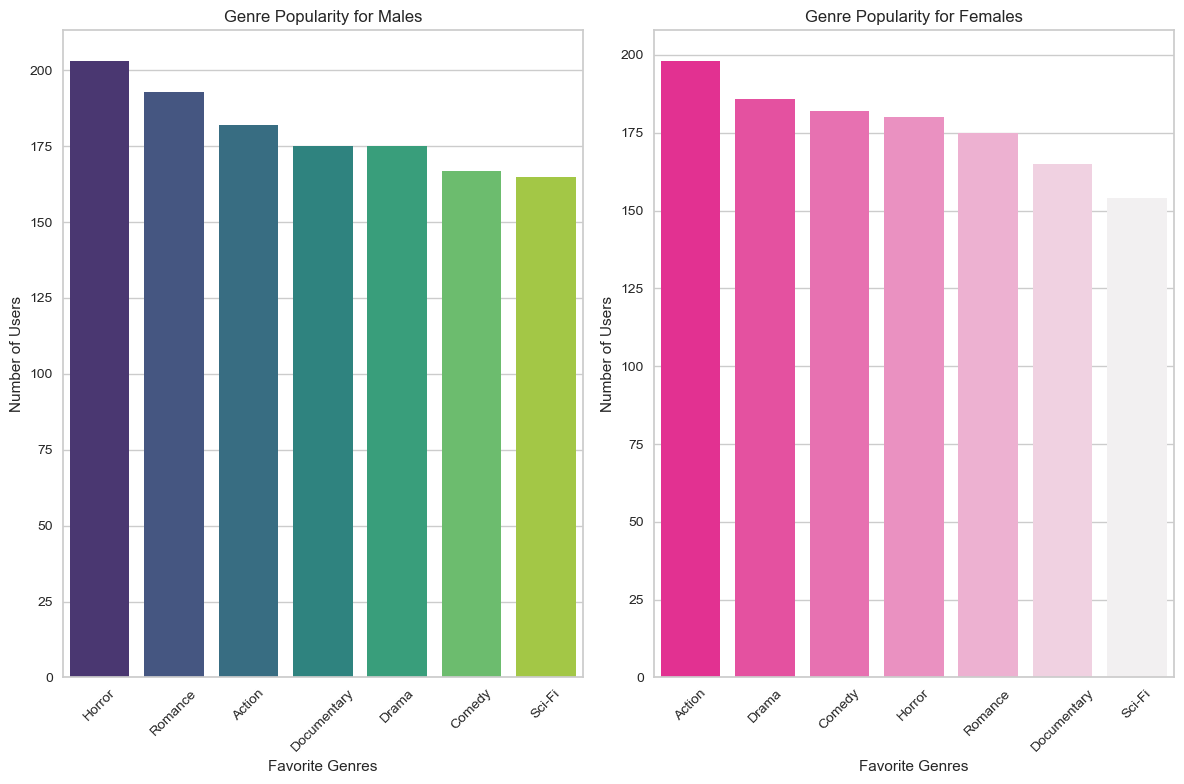

In [55]:
# Grouping by 'Gender' and 'Favorite Genres' and counting occurrences
genre_popularity = user_df.groupby(['Gender', 'Favorite Genres']).size().reset_index(name='User Count')

# Sorting the data by 'User Count' within each 'Gender' category
genre_popularity_sorted = genre_popularity.sort_values(by=['Gender', 'User Count'], ascending=[True, False])

# Define a custom color palette for Female
custom_palette_female = sns.light_palette("#FF1493", n_colors=len(genre_popularity_sorted[genre_popularity_sorted['Gender'] == 'Female']['Favorite Genres'].unique()), reverse=True)

# Plotting genre popularity for each gender separately
plt.figure(figsize=(12, 8))

# Plotting for Male
plt.subplot(1, 2, 1)
sns.barplot(x='Favorite Genres', y='User Count', data=genre_popularity_sorted[genre_popularity_sorted['Gender'] == 'Male'], palette='viridis')
plt.title('Genre Popularity for Males')
plt.xlabel('Favorite Genres')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)

# Plotting for Female
plt.subplot(1, 2, 2)
sns.barplot(x='Favorite Genres', y='User Count', data=genre_popularity_sorted[genre_popularity_sorted['Gender'] == 'Female'], palette=custom_palette_female)
plt.title('Genre Popularity for Females')
plt.xlabel('Favorite Genres')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

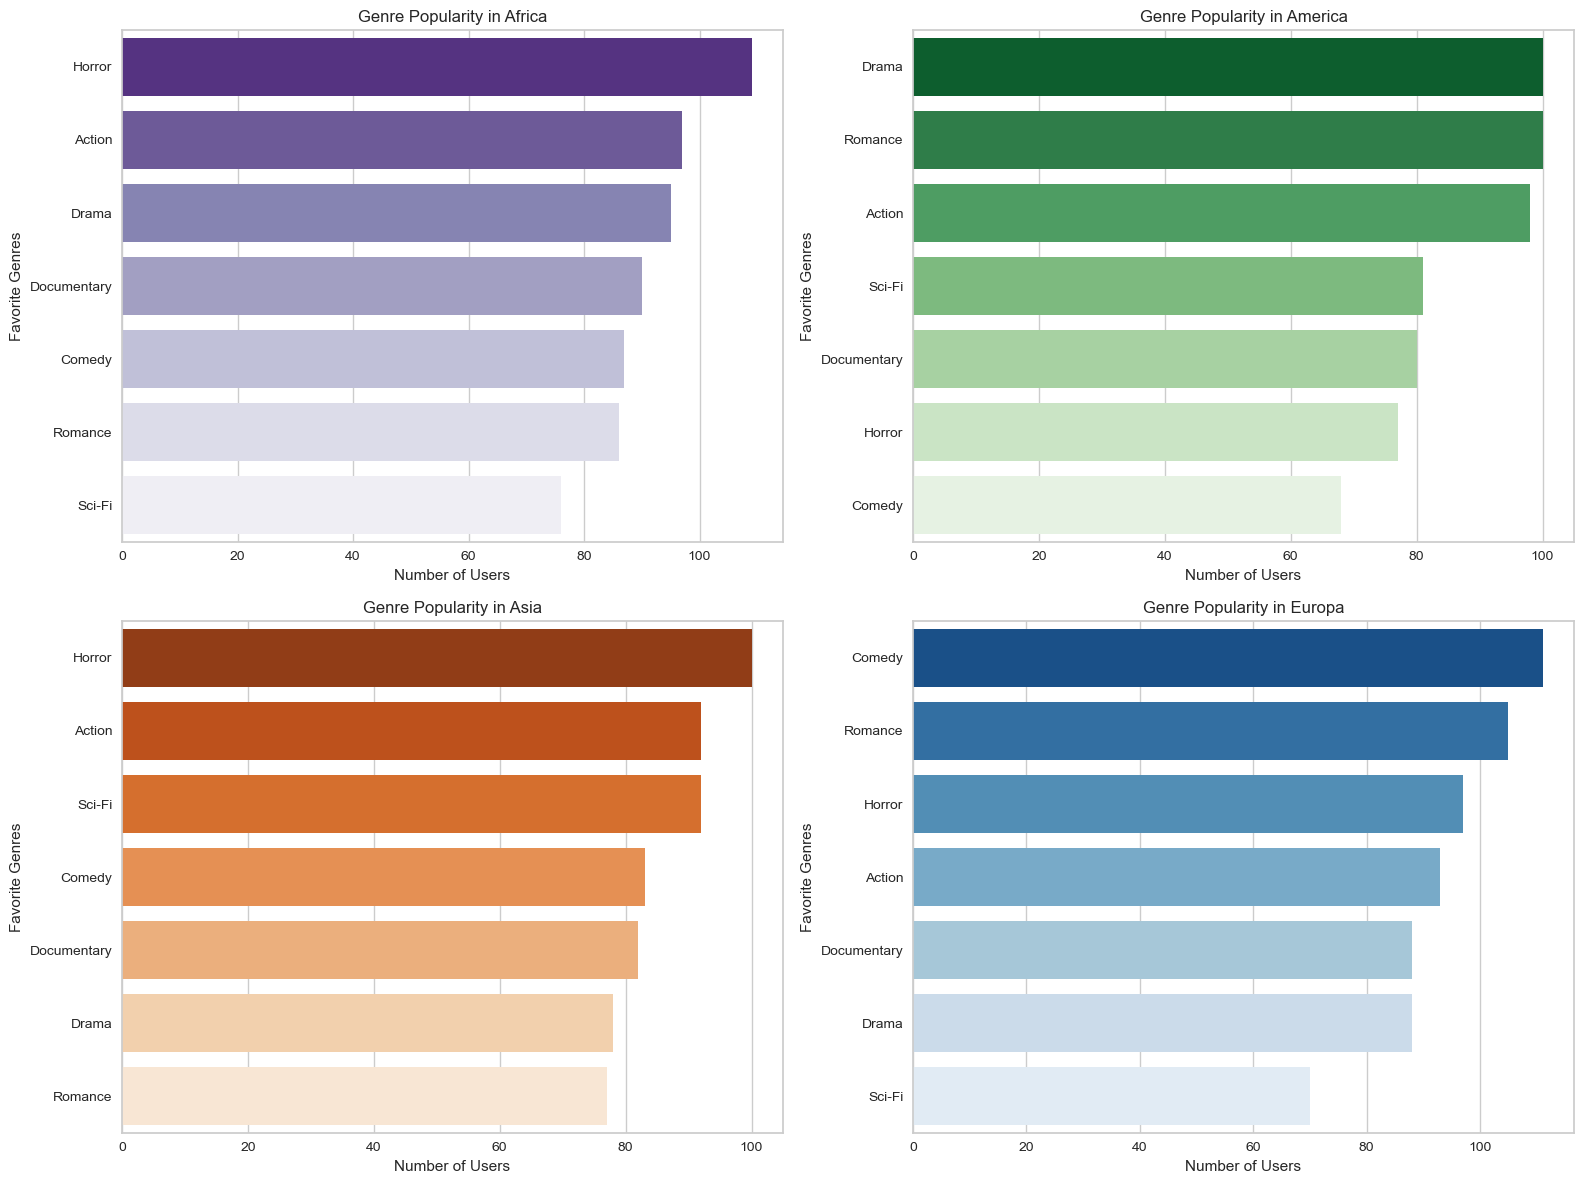

In [56]:

# Calculate genre frequencies by Location
genre_counts_location = user_df.groupby(['Country', 'Favorite Genres']).size().reset_index(name='User Count')

# Get unique countries
countries = genre_counts_location['Country'].unique()

# Define custom color palettes for each country
country_colors = {
    countries[0]: sns.color_palette("Purples", len(genre_counts_location[genre_counts_location['Country'] == countries[0]]))[::-1],
    countries[1]: sns.color_palette("Greens", len(genre_counts_location[genre_counts_location['Country'] == countries[1]]))[::-1],
    countries[2]: sns.color_palette("Oranges", len(genre_counts_location[genre_counts_location['Country'] == countries[2]]))[::-1],
    countries[3]: sns.color_palette("Blues", len(genre_counts_location[genre_counts_location['Country'] == countries[3]]))[::-1]
}

# Define the number of subplots
n_rows, n_cols = 2, 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))
axes = axes.flatten()

# Plotting horizontal bar charts for each country
for i, country in enumerate(countries[:n_rows * n_cols]):  # Limiting to the first 4 countries
    country_data = genre_counts_location[genre_counts_location['Country'] == country].sort_values(by='User Count', ascending=False)
    palette = country_colors[country]  # Get the corresponding palette
    sns.barplot(x='User Count', y='Favorite Genres', data=country_data, palette=palette, ax=axes[i])
    axes[i].set_title(f'Genre Popularity in {country}')
    axes[i].set_xlabel('Number of Users')
    axes[i].set_ylabel('Favorite Genres')

plt.tight_layout()
plt.show()


<Figure size 2000x1000 with 0 Axes>

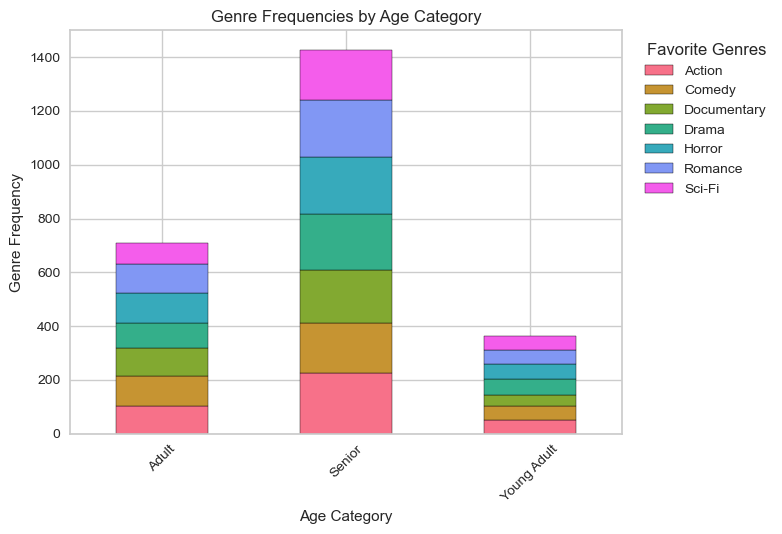

In [60]:
# Calculate genre frequencies by age category
genre_counts_by_age = user_df.groupby(['Age Category', 'Favorite Genres']).size().reset_index(name='User Count')

# Pivot the data to prepare for stacked bar chart
genre_counts_pivot = genre_counts_by_age.pivot(index='Age Category', columns='Favorite Genres', values='User Count').fillna(0)

# Define a color palette for genres based on unique genres in user_df
palette = sns.color_palette('husl', n_colors=len(user_df['Favorite Genres'].unique()))

# Plotting the stacked bar chart
plt.figure(figsize=(20, 10))
genre_counts_pivot.plot(kind='bar', stacked=True, color=palette, edgecolor='black')
plt.xlabel('Age Category')
plt.ylabel('Genre Frequency')
plt.title('Genre Frequencies by Age Category')
plt.xticks(rotation=45)

# Move legend to top right
plt.legend(title='Favorite Genres', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()


<div style="background-color: #e6f7ff; color: black; padding: 10px; border-radius: 5px;">
  <p style="font-size: 1.2em; margin-bottom: 10px;">By visualizing the popularity of genres across various user demographics, distinct patterns emerge. Among male users, horror and romance movies are particularly popular. Conversely, female users predominantly enjoy action and drama genres. When examining regional preferences, African users show a strong inclination towards horror and action movies. In contrast, American users favor drama and romance. Asian users also lean towards horror and action genres, while European users primarily enjoy comedy and romance movies.
 
</p>

 <p style="font-size: 1.2em; margin-bottom: 10px;">Regarding age-based preferences, senior users display a balanced interest across all genre categories. This suggests that they do not have a significant preference for any specific genre, indicating a more diverse taste in movie selection compared to other demographic groups.
</p>

</div>














<div style="background-color:#3366ff; color: #e6f7ff; padding: 20px; border-radius: 10px;">
  <h2>2.5 User Behavior  </h2>
</div>


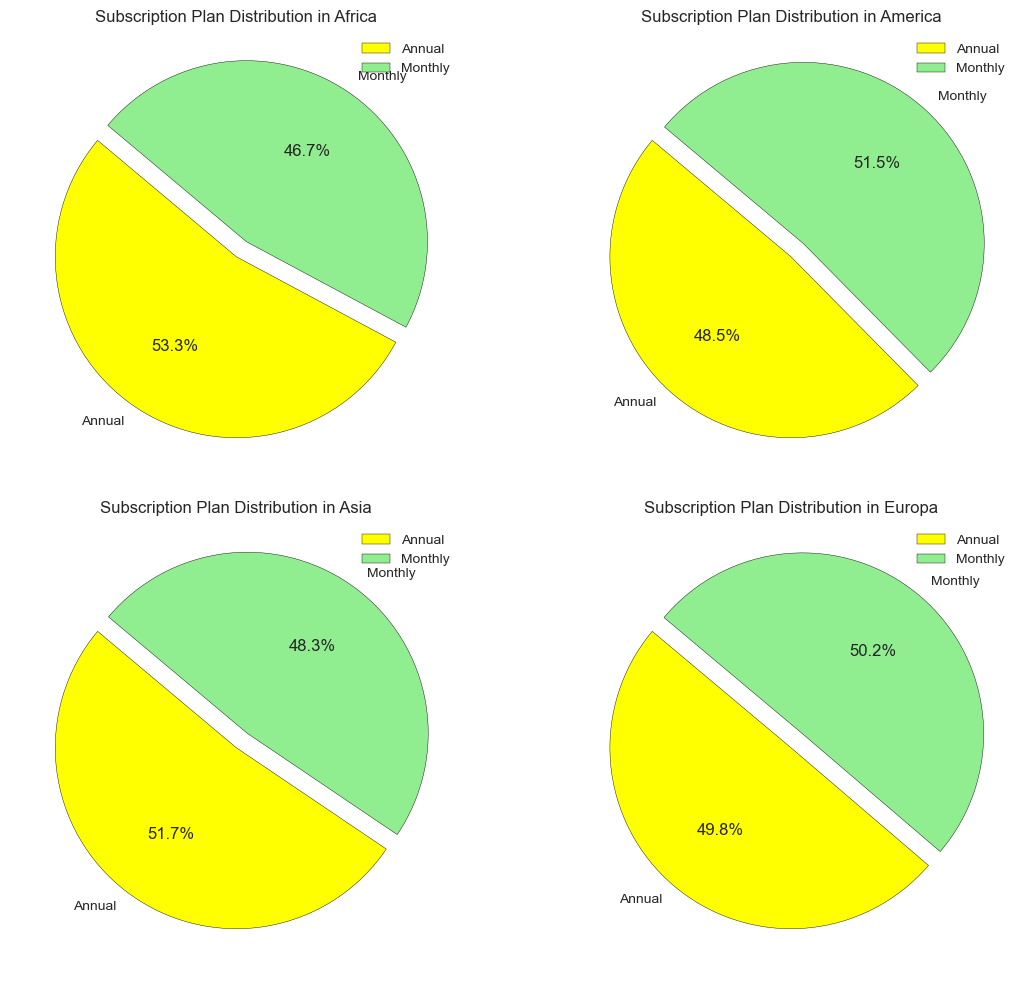

In [61]:
# Grouping by Country and Subscription Plan, and counting occurrences
subscription_counts_country = user_df.groupby(['Country', 'Subscription Plan']).size().reset_index(name='Count')

# Get unique countries
countries = subscription_counts_country['Country'].unique()

# Define the number of subplots
n_rows, n_cols = 2, 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))
axes = axes.flatten()

# Define colors for each subscription plan category
colors = ['yellow', 'lightgreen']

# Plotting pie charts for each country
for i, country in enumerate(countries[:n_rows * n_cols]):  # Limiting to the first 4 countries
    country_data = subscription_counts_country[subscription_counts_country['Country'] == country]
    counts = country_data['Count']
    labels = country_data['Subscription Plan']
    
    axes[i].pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0, 0.1), wedgeprops={'edgecolor': 'black'})
    axes[i].set_title(f'Subscription Plan Distribution in {country}')
    axes[i].legend()

plt.tight_layout()
plt.show()

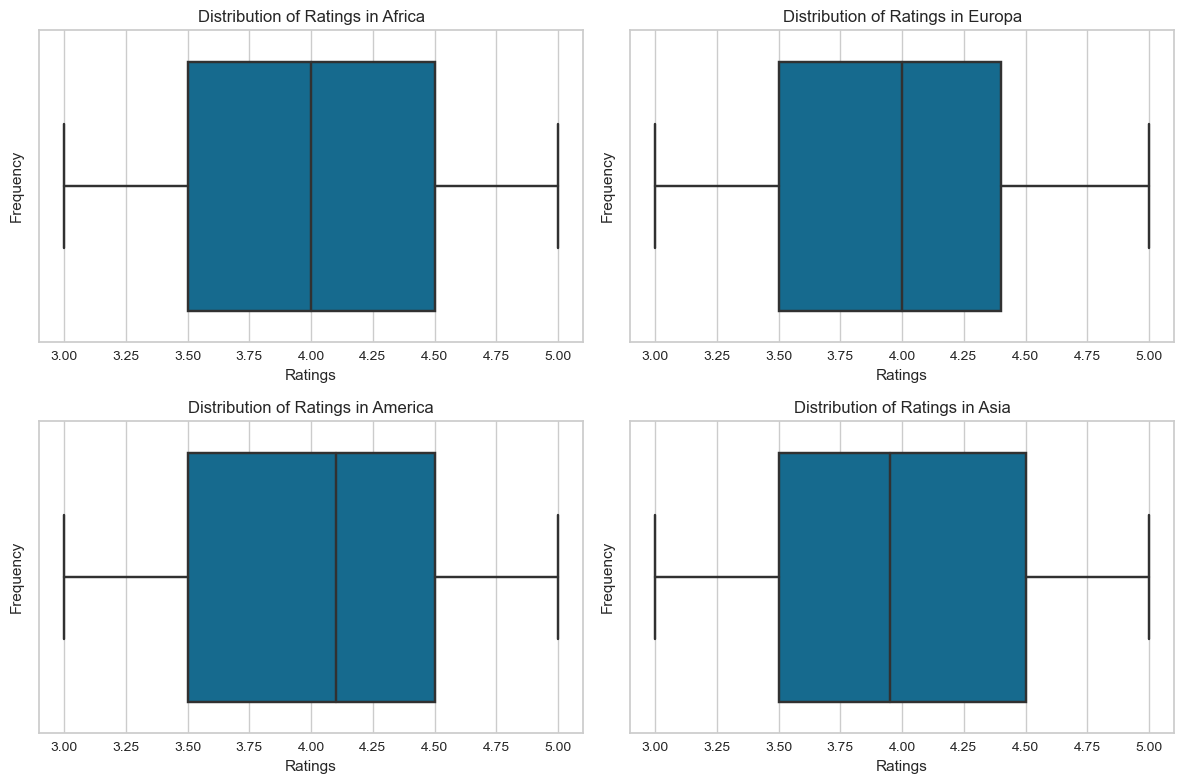

In [62]:
plt.figure(figsize=(12, 8))

# Define the order of countries for consistent plotting
countries = user_df2['Country'].unique()

# Create subplots for each country
for i, country in enumerate(countries, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Feedback/Ratings', data=user_df2[user_df2['Country'] == country])
    plt.title(f'Distribution of Ratings in {country}')
    plt.xlabel('Ratings')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

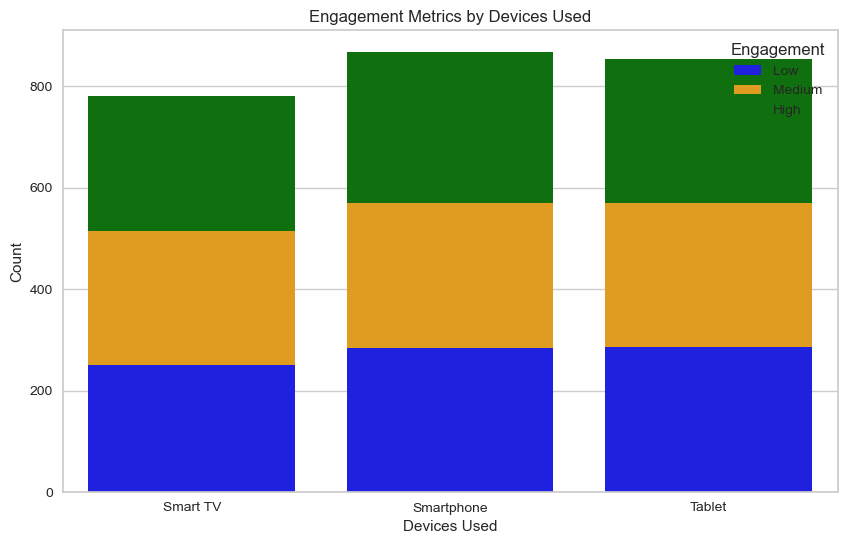

In [63]:
# Count occurrences of each engagement metric by device
counts = user_df2.groupby(['Devices Used', 'Engagement Metrics']).size().reset_index(name='Count')

# Pivot the data to have Device as rows and Engagement Metrics as columns
pivot_df = counts.pivot(index='Devices Used', columns='Engagement Metrics', values='Count').fillna(0)

# Define the order of engagement metrics for consistent plotting
engagement_order = ['Low', 'Medium', 'High']

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=pivot_df.index, y=pivot_df['Low'], label='Low', color='blue', order=pivot_df.index)
sns.barplot(x=pivot_df.index, y=pivot_df['Medium'], bottom=pivot_df['Low'], label='Medium', color='orange', order=pivot_df.index)
sns.barplot(x=pivot_df.index, y=pivot_df['High'], bottom=pivot_df['Low'] + pivot_df['Medium'], label='High', color='green', order=pivot_df.index)

# Add labels and title
plt.xlabel('Devices Used')
plt.ylabel('Count')
plt.title('Engagement Metrics by Devices Used')
plt.legend(title='Engagement')

plt.show()

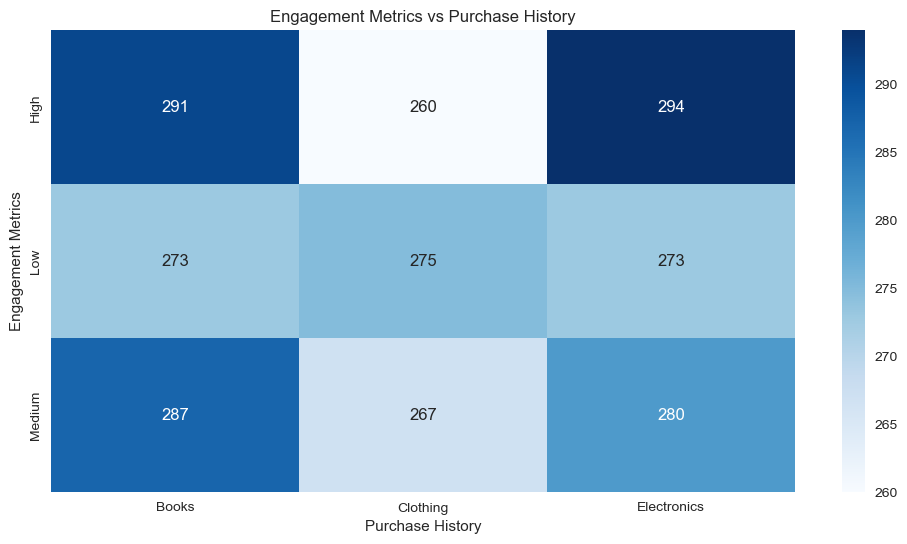

In [64]:
# Create a pivot table with counts
pivot_table = user_df2.pivot_table(index='Engagement Metrics', columns='Purchase History', aggfunc='size', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='d')

# Add labels and title
plt.xlabel('Purchase History')
plt.ylabel('Engagement Metrics')
plt.title('Engagement Metrics vs Purchase History')

plt.show()


<div style="background-color: #e6f7ff; color: black; padding: 10px; border-radius: 5px;">
  <p style="font-size: 1.2em; margin-bottom: 10px;">By analyzing the subscription plans, we observe that they are evenly split between half-yearly and monthly plans across all countries. When examining average ratings, users in Africa and Europe tend to give an average rating of 4. In America, the average rating is slightly higher than 4, while in Asia, it is slightly lower.
</p>

 <p style="font-size: 1.2em; margin-bottom: 10px;">Regarding device usage, smartphones are the most commonly used devices for watching movies, with tablets being the second most popular choice. Furthermore, there is a notable correlation between customers who purchase electronic products and their engagement levels on the platform. This suggests that users who buy electronics are more likely to engage actively with the platform.
</p>

</div>











<div style="background-color: #0000ff; color: #e6f7ff; padding: 20px; border-radius: 10px;">
  <h2>Step 3 | Data Preprocessing & Clustering </h2>
</div>


In [65]:
from sklearn.preprocessing import OneHotEncoder

# Make a copy of the DataFrame for encoding
encoded_df = user_df2.copy()

# Define ordinal encoding mappings for 'Usage Frequency' and 'Engagement Metrics'
usage_mapping = {'Frequent': 2, 'Regular': 1, 'Occasional': 0}
engagement_mapping = {'Low': 0, 'Medium': 1, 'High': 2}

# Apply ordinal encoding for 'Usage Frequency' and 'Engagement Metrics'
encoded_df['Usage Frequency_encoded'] = encoded_df['Usage Frequency'].map(usage_mapping)
encoded_df['Engagement Metrics_encoded'] = encoded_df['Engagement Metrics'].map(engagement_mapping)

# Drop the original columns after encoding
encoded_df.drop(['Usage Frequency', 'Engagement Metrics'], axis=1, inplace=True)

# Define columns for one-hot encoding
categorical_columns = ['Gender', 'Subscription Plan', 'Payment Information', 
                       'Renewal Status', 'Purchase History', 'Favorite Genres', 
                       'Devices Used', 'Country']

# Apply one-hot encoding for all remaining categorical columns
encoded_df = pd.get_dummies(encoded_df, columns=categorical_columns, drop_first=True)


encoded_df.drop('Age Category', axis=1, inplace=True)

# Display the encoded DataFrame
encoded_df.head(10)

User ID  Feedback/Ratings  Age  Membership Duration  \
0        1               3.6   71                  365   
1        2               3.8   46                  365   
2        3               3.3   30                  365   
3        4               3.3   60                  365   
4        5               4.3   63                  365   
5        6               3.8   70                  365   
6        7               4.4   21                  365   
7        8               3.6   78                  365   
8        9               4.0   74                  365   
9       10               4.9   61                  365   

   Usage Frequency_encoded  Engagement Metrics_encoded  Gender_Male  \
0                        1                           1         True   
1                        1                           1         True   
2                        1                           0        False   
3                        1                           2        False   
4                        2                           0         True   
5                        0                           0        False   
6                        2                           1         True   
7                        1                           1         True   
8                        2                           1        False   
9                        2                           2         True   

   Subscription Plan_Monthly  Payment Information_Mastercard  \
0                      False                            True   
1                       True                           False   
2                       True                            True   
3                       True                           False   
4                      False                           False   
5                       True                           False   
6                       True                           False   
7                       True                           False   
8                      False                           False   
9                       True                           False   

   Payment Information_Visa  ...  Favorite Genres_Documentary  \
0                     False  ...                         True   
1                      True  ...                        False   
2                     False  ...                        False   
3                     False  ...                         True   
4                      True  ...                        False   
5                     False  ...                        False   
6                     False  ...                        False   
7                      True  ...                        False   
8                     False  ...                         True   
9                      True  ...                        False   

   Favorite Genres_Drama  Favorite Genres_Horror  Favorite Genres_Romance  \
0                  False                   False                    False   
1                  False                    True                    False   
2                  False                   False                    False   
3                  False                   False                    False   
4                   True                   False                    False   
5                  False                   False                    False   
6                  False                   False                    False   
7                  False                    True                    False   
8                  False                   False                    False   
9                   True                   False                    False   

   Favorite Genres_Sci-Fi  Devices Used_Smartphone  Devices Used_Tablet  \
0                   False                    False                False   
1                   False                     True                False   
2                   False                    False                False   
3            

<div style="background-color: #e6f7ff; color: black; padding: 10px; border-radius: 5px;">
  <p style="font-size: 1.2em; margin-bottom: 10px;">Proper encoding of categorical data is crucial for effective clustering. In this analysis, "Usage Frequency" and "Engagement Metrics" were encoded using label encoding to reflect their inherent order. Other categorical columns, such as "Gender," "Subscription Plan," "Payment Information," "Renewal Status," "Purchase History," "Favorite Genres," "Devices Used," and "Country," were encoded using one-hot encoding. This step is essential for ensuring accurate clustering results.</p>

</div>











<div style="background-color:#3366ff; color: #e6f7ff; padding: 20px; border-radius: 10px;">
  <h2>3.1 Data Scaling  </h2>
</div>


In [66]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['Age', 'Membership Duration', 'Feedback/Ratings']  

# Instantiate the scaler
scaler = StandardScaler()

# Scale the numerical columns
encoded_df[numerical_columns] = scaler.fit_transform(encoded_df[numerical_columns])

# Scale the entire dataset (excluding 'User ID')
scaled_features = scaler.fit_transform(encoded_df.drop(columns=['User ID']))

encoded_df.head()


User ID  Feedback/Ratings       Age  Membership Duration  \
0        1         -0.697078  0.773267                  0.0   
1        2         -0.352638 -0.414854                  0.0   
2        3         -1.213738 -1.175251                  0.0   
3        4         -1.213738  0.250494                  0.0   
4        5          0.508462  0.393068                  0.0   

   Usage Frequency_encoded  Engagement Metrics_encoded  Gender_Male  \
0                        1                           1         True   
1                        1                           1         True   
2                        1                           0        False   
3                        1                           2        False   
4                        2                           0         True   

   Subscription Plan_Monthly  Payment Information_Mastercard  \
0                      False                            True   
1                       True                           False   
2                       True                            True   
3                       True                           False   
4                      False                           False   

   Payment Information_Visa  ...  Favorite Genres_Documentary  \
0                     False  ...                         True   
1                      True  ...                        False   
2                     False  ...                        False   
3                     False  ...                         True   
4                      True  ...                        False   

   Favorite Genres_Drama  Favorite Genres_Horror  Favorite Genres_Romance  \
0                  False                   False                    False   
1                  False                    True                    False   
2                  False                   False                    False   
3                  False                   False                    False   
4                   True                   False                    False   

   Favorite Genres_Sci-Fi  Devices Used_Smartphone  Devices Used_Tablet  \
0                   False                    False                False   
1                   False                     True                False   
2                   False                    False                False   
3                   False                    False                False   
4                   False                    False                False   

   Country_America  Country_Asia  Country_Europa  
0            False         False           False  
1            False         False            True  
2            False         False           False  
3             True         False           False  
4            False          True           False  

[5 rows x 24 columns]

<div style="background-color:#3366ff; color: #e6f7ff; padding: 20px; border-radius: 10px;">
  <h2>3.2 Dimensionality Reduction  </h2>
</div>

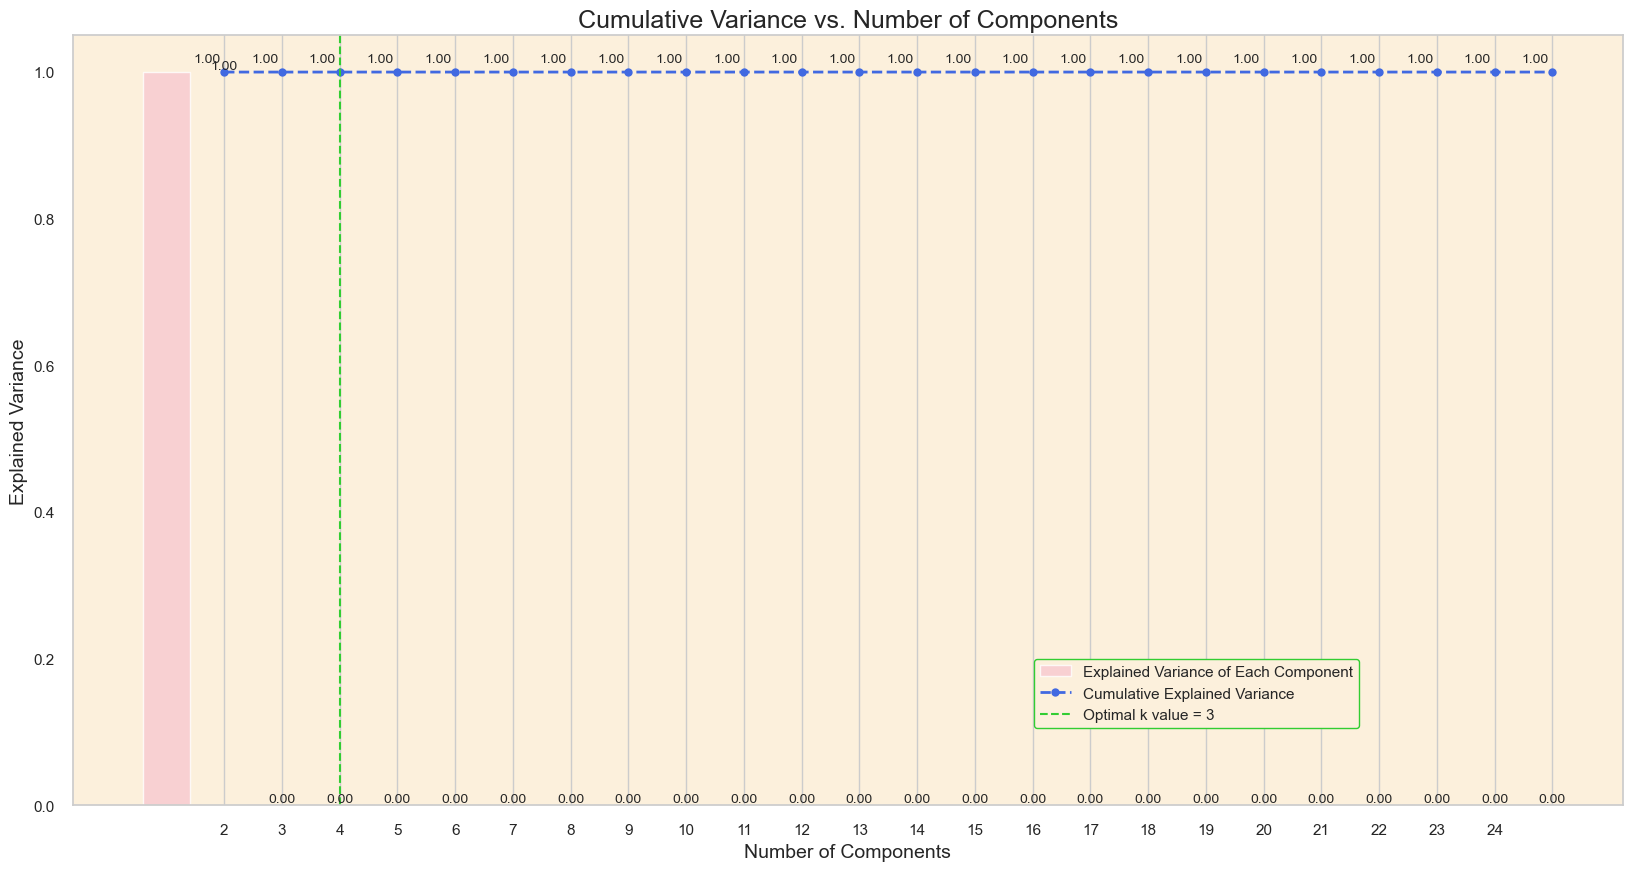

In [75]:
# Perform PCA
pca = PCA()
pca.fit(encoded_df)

# Calculate explained variance ratio and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Determine optimal k value (if applicable)
optimal_k = 3  

# Set seaborn plot style to whitegrid
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='whitegrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(explained_variance_ratio) + 1)),
                      y=explained_variance_ratio,
                      color='#ffc0cb',  # Pink color
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#4169e1', linewidth=2)  # Royal blue color

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k, color='#32cd32', linestyle='--', label=f'Optimal k value = {optimal_k}')  # Lime green color

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,
           edgecolor='#32cd32')  # Lime green color

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i + 1, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    plt.text(i + 1 + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')
plt.show()


In [76]:
# Creating a PCA object with 3 components
pca = PCA(n_components=3)

# Fitting and transforming the original data to the new PCA dataframe
encoded_df_pca = pca.fit_transform(encoded_df)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
encoded_df_pca = pd.DataFrame(encoded_df_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
encoded_df_pca.index = encoded_df.index

In [77]:
# Displaying the resulting dataframe based on the PCs
encoded_df_pca.head()

PC1       PC2       PC3
0  1249.499984  0.154101 -1.060526
1  1248.500008 -0.514153 -0.018084
2  1247.500010 -1.621222 -0.250756
3  1246.500023 -0.584778 -1.062785
4  1245.499919  0.643924  0.030476

In [71]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #ffeacc' if i in top3 else '' for i in column.index]

# Create the PCA component DataFrame and apply the highlighting function
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],  
                     index=encoded_df.columns)

pc_df.style.apply(highlight_top3, axis=0)

<div style="background-color: #e6f7ff; color: black; padding: 10px; border-radius: 5px;">
  <p style="font-size: 1.2em; margin-bottom: 10px;">Dimensional reduction is used to simplify a dataset by reducing the number of features while preserving as much relevant information as possible. This process helps in mitigating issues like overfitting, improving computational efficiency, and making it easier to visualize high-dimensional data. By focusing on the most important features, dimensional reduction enhances the performance of machine learning models and aids in better understanding the underlying structure of the data.</p>

</div>








<div style="background-color:#3366ff; color: #e6f7ff; padding: 20px; border-radius: 10px;">
  <h2>3.3 determining the optimal number of clusters  </h2>
</div>


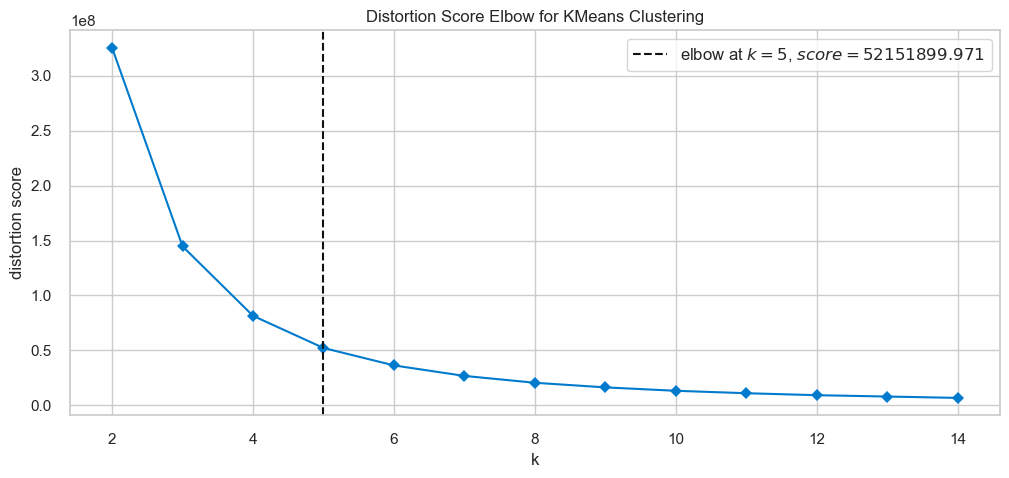

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [72]:
# Instantiate KMeans model
km = KMeans(random_state=42)

# Set plot style and background 
sns.set(style='whitegrid', rc={'axes.facecolor': '#ffffff'})

# Set the color palette for the plot
sns.set_palette(['#007acc'])  # Dark blue color

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the KMeans model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Fit the PCA-transformed data to the visualizer
visualizer.fit(encoded_df_pca)

# Finalize and render the figure
visualizer.show()


In [78]:
def silhouette_analysis(encoded_df_pca, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """

    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)

    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    # First plot: Silhouette scores for different k values
    sns.set_palette(['darkorange'])

    silhouette_scores = []

    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(encoded_df_pca)
        labels = km.predict(encoded_df_pca)
        score = silhouette_score(encoded_df_pca, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom', 
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))
             

    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):    
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(encoded_df_pca)

        # Add the Silhouette score text to the plot
        score = silhouette_score(encoded_df_pca, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

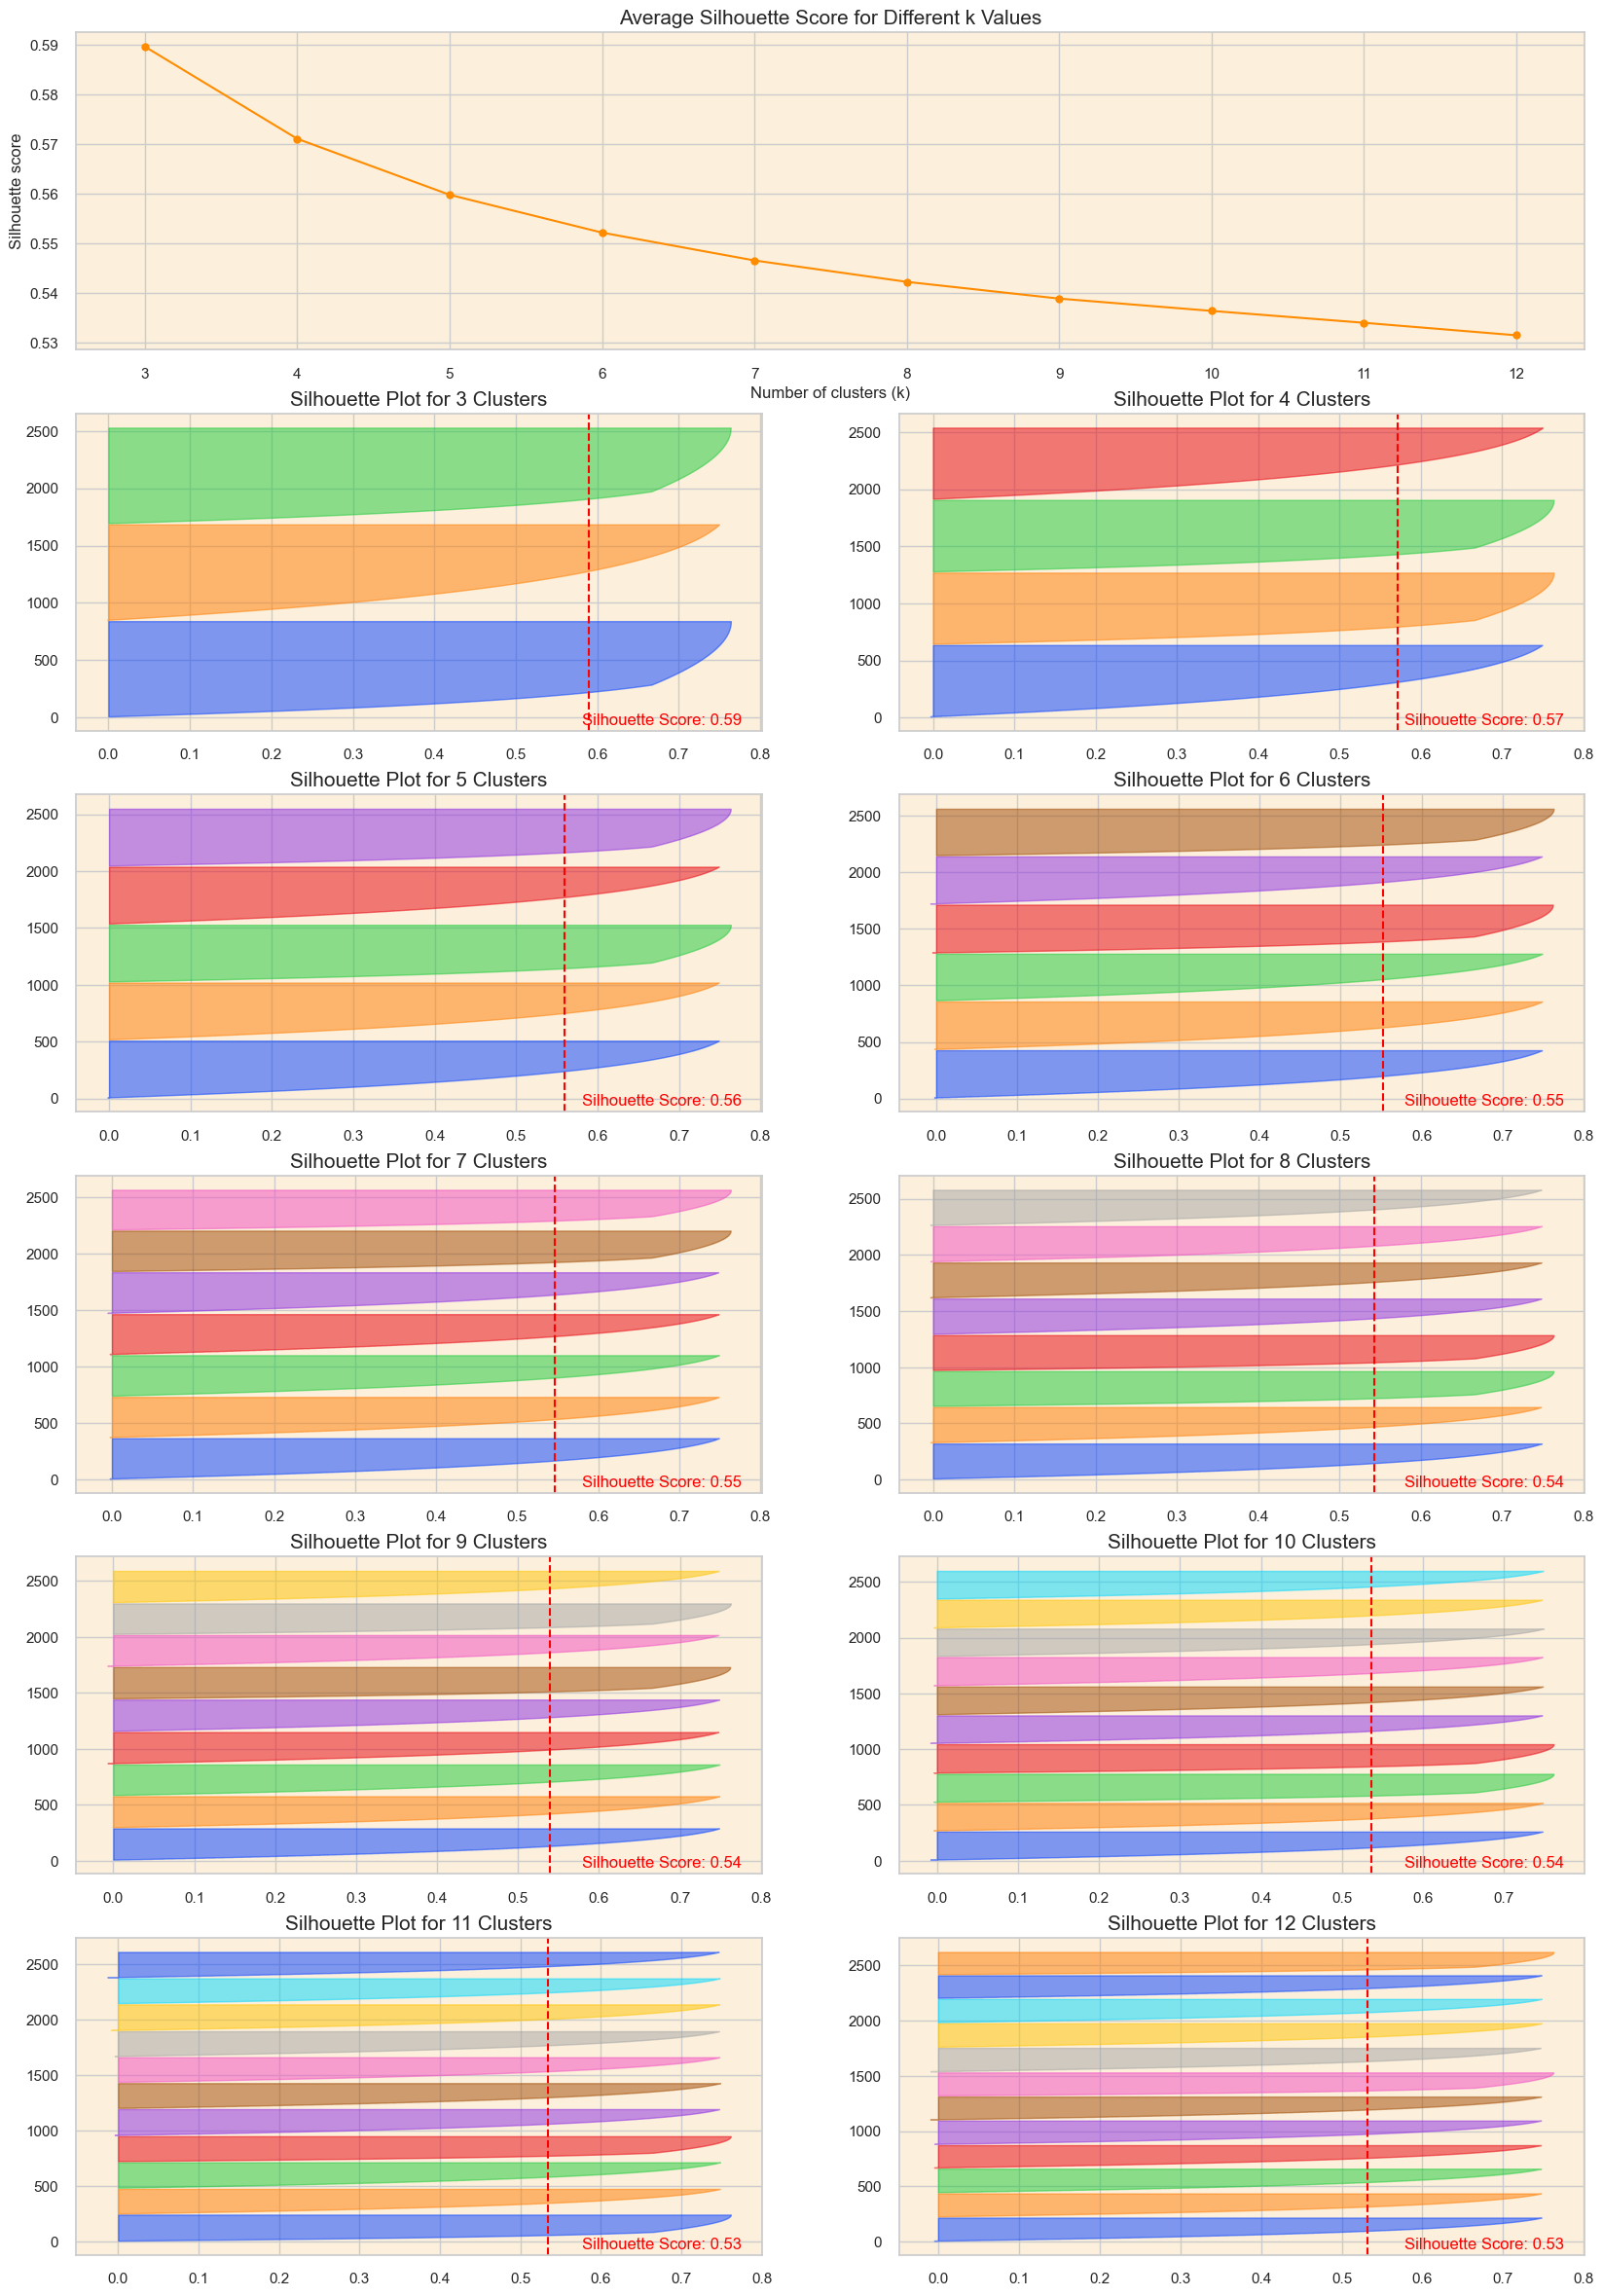

In [94]:
silhouette_analysis(encoded_df, 3, 12, figsize=(20, 50))

<div style="background-color: #e6f7ff; color: black; padding: 10px; border-radius: 5px;">
  <p style="font-size: 1.2em; margin-bottom: 10px;">To determine the best number of clusters, we used the elbow method and the silhouette score method. After analyzing and experimenting with different cluster numbers, we chose 3 as the most suitable number for our clusters.</p>
  
  <p style="font-size: 1.2em; margin-bottom: 10px;">The elbow method involves plotting the explained variance as a function of the number of clusters and selecting the point where the rate of variance reduction slows down, forming an "elbow." This point indicates the optimal number of clusters as adding more clusters beyond this point yields diminishing returns in terms of variance explained.</p>
  
  <p style="font-size: 1.2em; margin-bottom: 10px;">The silhouette score method measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters. The score ranges from -1 to 1, where a value close to 1 indicates appropriate clustering, 0 indicates overlapping clusters, and negative values indicate misassigned clusters. Using these methods, we determined that 3 clusters provide the best balance of intra-cluster similarity and inter-cluster difference for our dataset.</p>
</div>















<div style="background-color:#3366ff; color: #e6f7ff; padding: 20px; border-radius: 10px;">
  <h2>3.4  Clustering Model K-means </h2>
</div>


In [79]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(encoded_df_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset 'user_df2'
user_df2['cluster'] = new_labels

# Append the new cluster labels to the 'encoded_df'
encoded_df_pca['cluster'] = new_labels

<div style="background-color:#3366ff; color: #e6f7ff; padding: 20px; border-radius: 10px;">
  <h2>3.5 Clustering Evaluation </h2>
</div>


In [80]:
# Setting up the color scheme for the clusters (RGB order)
colors = ['#FFD700', '#8B4513', '#9370DB'] 

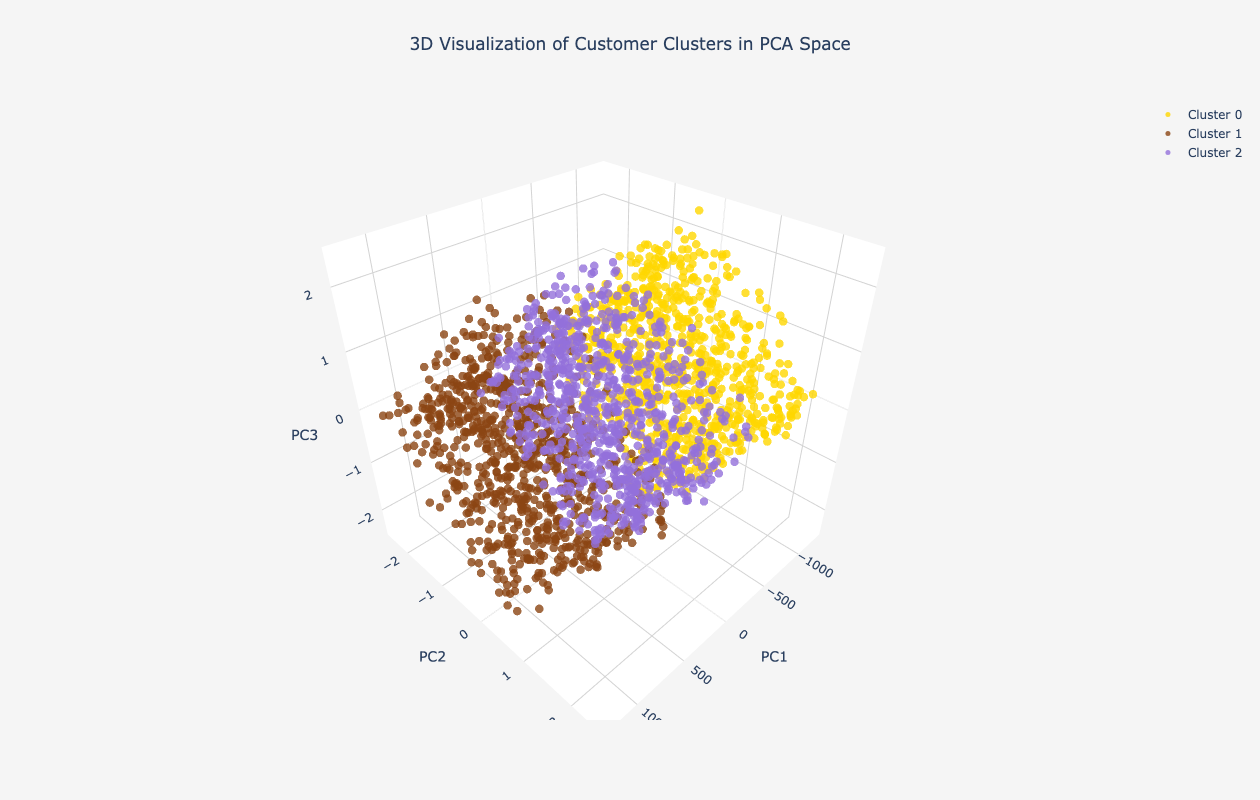

In [81]:
cluster_0 = encoded_df_pca[encoded_df_pca['cluster'] == 0]
cluster_1 = encoded_df_pca[encoded_df_pca['cluster'] == 1]
cluster_2 = encoded_df_pca[encoded_df_pca['cluster'] == 2]


fig = go.Figure()


fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'], 
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.8), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'], 
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.8), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'], 
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.8), name='Cluster 2'))


fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(title='PC1', backgroundcolor='white', gridcolor='lightgrey'),  # Set background and grid colors
        yaxis=dict(title='PC2', backgroundcolor='white', gridcolor='lightgrey'),
        zaxis=dict(title='PC3', backgroundcolor='white', gridcolor='lightgrey'),
    ),
    width=900,
    height=800,
    paper_bgcolor='whitesmoke', 
)

# Show the plot
fig.show()


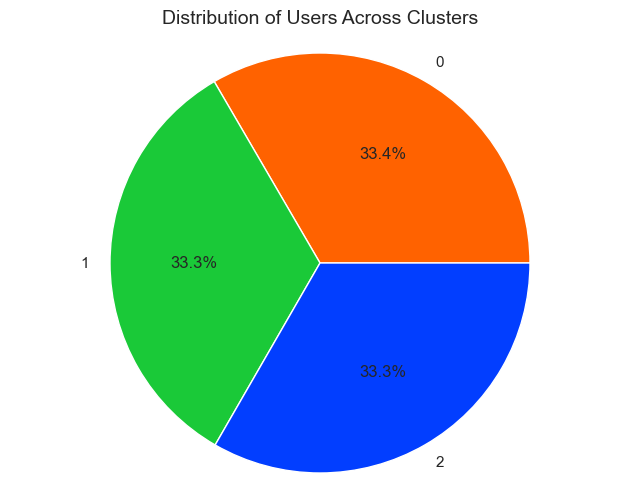

In [82]:
# Calculate the percentage of User in each cluster
cluster_percentage = (encoded_df_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Set a new color palette for the pie chart
colors = ['#ff6200', '#1ac938', '#023eff']  

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(cluster_percentage['Percentage'], labels=cluster_percentage['Cluster'], autopct='%1.1f%%', colors=colors)

# Set the title
plt.title('Distribution of Users Across Clusters', fontsize=14)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


In [128]:
# Merge 'cluster' information from 'encoded_df_pca' into 'encoded_df' based on index
encoded_df = pd.merge(encoded_df, encoded_df_pca[['cluster']], left_index=True, right_index=True, how='left')

# Check for any missing 'cluster' values after merge (optional)
missing_clusters = encoded_df['cluster'].isnull().sum()
if missing_clusters > 0:
    print(f"Warning: {missing_clusters} rows in 'encoded_df' do not have corresponding 'cluster' information from 'encoded_df_pca'.")





In [129]:
cluster_centroids = encoded_df.groupby('cluster').mean()
cluster_centroids.head()

User ID  Feedback/Ratings       Age  Membership Duration  \
cluster                                                             
0         2083.0          0.005002  0.000690                  0.0   
1          416.5          0.045621 -0.046136                  0.0   
2         1249.0         -0.050581  0.045390                  0.0   

         Usage Frequency_encoded  Engagement Metrics_encoded  Gender_Male  \
cluster                                                                     
0                       1.028743                    1.001198     0.511377   
1                       1.002404                    1.039663     0.500000   
2                       1.003601                    0.987995     0.500600   

         Subscription Plan_Monthly  Payment Information_Mastercard  \
cluster                                                              
0                         0.477844                        0.342515   
1                         0.489183                        0.353365   
2                         0.507803                        0.331333   

         Payment Information_Visa  ...  Favorite Genres_Horror  \
cluster                            ...                           
0                        0.332934  ...                0.165269   
1                        0.331731  ...                0.158654   
2                        0.340936  ...                0.135654   

         Favorite Genres_Romance  Favorite Genres_Sci-Fi  \
cluster                                                    
0                       0.149701                0.116168   
1                       0.138221                0.128606   
2                       0.153661                0.138055   

         Devices Used_Smartphone  Devices Used_Tablet  Country_America  \
cluster                                                                  
0                       0.343713             0.350898         0.215569   
1                       0.342548             0.352163         0.239183   
2                       0.354142             0.320528         0.270108   

         Country_Asia  Country_Europa  cluster_x  cluster_y  
cluster                                                      
0            0.255090        0.263473        0.0        0.0  
1            0.240385        0.258413        1.0        1.0  
2            0.229292        0.260504        2.0        2.0  

[3 rows x 26 columns]

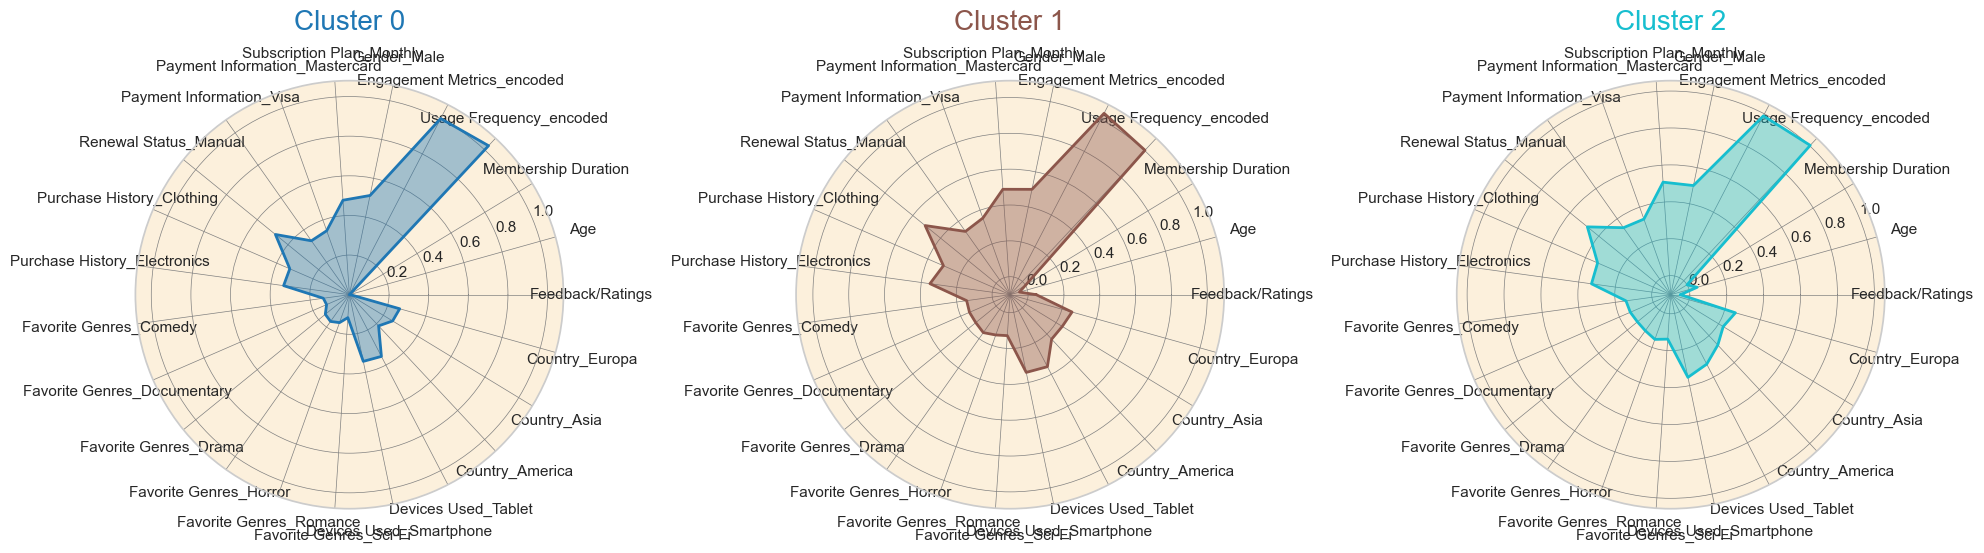

In [118]:
labels = np.array(cluster_centroids.drop(columns=['User ID']).columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Colors for each cluster (adjust as needed)
colors = plt.cm.tab10(np.linspace(0, 1, len(cluster_centroids)))

# Initialize the figure
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=len(cluster_centroids))

# Function to create a radar chart for a cluster
def create_radar_chart(ax, angles, data, color, cluster):
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].drop(['User ID']).tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

    # Add input data (feature labels)
    ax[i].set_xticks(angles[:-1])
    ax[i].set_xticklabels(labels[:-1])

    # Add a grid
    ax[i].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()

<div style="background-color: #0000ff; color: #e6f7ff; padding: 20px; border-radius: 10px;">
  <h2>Step 4 | Recommendation System  </h2>
</div>


In [119]:
# Group by cluster and calculate the mean preferences for each genre
cluster_genre_preferences = encoded_df.groupby('cluster')[['Favorite Genres_Comedy', 'Favorite Genres_Drama',
                                                           'Favorite Genres_Horror', 'Favorite Genres_Romance',
                                                           'Favorite Genres_Sci-Fi']].mean()

# Initialize a dictionary to store the most popular genres for each cluster
top_genres_per_cluster = {}

# Iterate over each cluster to find the top genres
for cluster in cluster_genre_preferences.index:
    # Get the genres sorted by mean preference in the current cluster
    top_genres = cluster_genre_preferences.loc[cluster].sort_values(ascending=False).index[:2].tolist()
    top_genres_per_cluster[cluster] = top_genres

# Print the top genres for each cluster
for cluster, genres in top_genres_per_cluster.items():
    print(f"The top genres in cluster {cluster} are: {genres[0]} and {genres[1]}.")


The top genres in cluster 0 are: Favorite Genres_Horror and Favorite Genres_Drama.
The top genres in cluster 1 are: Favorite Genres_Horror and Favorite Genres_Drama.
The top genres in cluster 2 are: Favorite Genres_Romance and Favorite Genres_Comedy.


In [131]:
# Function to recommend popular genres for a user based on their cluster and individual preferences

def recommend_genres_for_user(user_id, cluster_genre_preferences, user_df):
    # Check if user_id exists in user_df
    if user_id not in user_df['User ID'].values:
        print(f"User ID {user_id} not found in the dataset.")
        return []

    # Retrieve user's cluster label
    user_cluster = user_df.loc[user_df['User ID'] == user_id, 'cluster'].values
    if len(user_cluster) == 0:
        print(f"User ID {user_id} does not have a cluster assigned.")
        return []

    user_cluster = user_cluster[0] 

    user_preferences = user_df.loc[user_df['User ID'] == user_id, ['Favorite Genres_Comedy', 'Favorite Genres_Drama',
                                                                   'Favorite Genres_Horror', 'Favorite Genres_Romance',
                                                                   'Favorite Genres_Sci-Fi']].values.flatten()

    # Get index of popular genres in the user's cluster 
    cluster_preferences = cluster_genre_preferences.loc[user_cluster].sort_values(ascending=False)

    # Calculate weighted score combining user preferences and cluster averages
    weighted_scores = cluster_preferences * (1 - user_preferences)

    # Recommend up to 3 genres with the highest weighted scores
    recommended_genres = weighted_scores.index[0:3].tolist()

    return recommended_genres

# Initialize an empty list to store recommendations
user_recommendations = []

random_user_ids = np.random.choice(encoded_df['User ID'].unique(), size=20, replace=False)

# Recommend genres for each randomly selected user
for user_id in random_user_ids:
    if user_id in encoded_df['User ID'].values:
        # Get the recommended genres
        recommended_genres = recommend_genres_for_user(user_id, cluster_genre_preferences, encoded_df)
        
        # Get user's cluster
        user_cluster = encoded_df.loc[encoded_df['User ID'] == user_id, 'cluster'].iloc[0]
        
        # Append user ID, cluster, and recommended genres to the list
        user_recommendations.append({
            'User ID': user_id,
            'Cluster': user_cluster,
            'Recommended Genre 1': recommended_genres[0] if len(recommended_genres) > 0 else None,
            'Recommended Genre 2': recommended_genres[1] if len(recommended_genres) > 1 else None,
            'Recommended Genre 3': recommended_genres[2] if len(recommended_genres) > 2 else None
        })
    else:
        print(f"User ID {user_id} not found in the dataset.")

# Create a DataFrame from the list of recommendations
user_recommendations_df = pd.DataFrame(user_recommendations)

# Display the DataFrame with recommended genres included as columns for each user
user_recommendations_df.head(20)


User ID  Cluster      Recommended Genre 1     Recommended Genre 2  \
0       699        1   Favorite Genres_Horror   Favorite Genres_Drama   
1      2301        0   Favorite Genres_Horror   Favorite Genres_Drama   
2       195        1   Favorite Genres_Horror   Favorite Genres_Drama   
3       567        1   Favorite Genres_Horror   Favorite Genres_Drama   
4       226        1   Favorite Genres_Horror   Favorite Genres_Drama   
5      2435        0   Favorite Genres_Horror   Favorite Genres_Drama   
6      2039        0   Favorite Genres_Horror   Favorite Genres_Drama   
7      1924        0   Favorite Genres_Horror   Favorite Genres_Drama   
8      1665        2  Favorite Genres_Romance  Favorite Genres_Comedy   
9      1278        2  Favorite Genres_Romance  Favorite Genres_Comedy   
10      205        1   Favorite Genres_Horror   Favorite Genres_Drama   
11     1069        2  Favorite Genres_Romance  Favorite Genres_Comedy   
12     1156        2  Favorite Genres_Romance  Favorite Genres_Comedy   
13     1554        2  Favorite Genres_Romance  Favorite Genres_Comedy   
14      831        1   Favorite Genres_Horror   Favorite Genres_Drama   
15     2126        0   Favorite Genres_Horror   Favorite Genres_Drama   
16      230        1   Favorite Genres_Horror   Favorite Genres_Drama   
17     1969        0   Favorite Genres_Horror   Favorite Genres_Drama   
18     2200        0   Favorite Genres_Horror   Favorite Genres_Drama   
19      201        1   Favorite Genres_Horror   Favorite Genres_Drama   

        Recommended Genre 3  
0    Favorite Genres_Comedy  
1   Favorite Genres_Romance  
2    Favorite Genres_Comedy  
3    Favorite Genres_Comedy  
4    Favorite Genres_Comedy  
5   Favorite Genres_Romance  
6   Favorite Genres_Romance  
7   Favorite Genres_Romance  
8    Favorite Genres_Sci-Fi  
9    Favorite Genres_Sci-Fi  
10   Favorite Genres_Comedy  
11   Favorite Genres_Sci-Fi  
12   Favorite Genres_Sci-Fi  
13   Favorite Genres_Sci-Fi  
14   Favorite Genres_Comedy  
15  Favorite Genres_Romance  
16   Favorite Genres_Comedy  
17  Favorite Genres_Romance  
18  Favorite Genres_Romance  
19   Favorite Genres_Comedy

<div style="background-color: #e6f7ff; color: black; padding: 10px; border-radius: 5px;">
  <p style="font-size: 1.2em; margin-bottom: 10px;">To develop a reliable recommendation system, we started by identifying the most popular genres within each user cluster. This involved analyzing what genres were liked most by users grouped together based on their similar preferences.</p>
  
  <p style="font-size: 1.2em; margin-bottom: 10px;">Next, we refined these recommendations using individual user preferences. This approach, called weighted recommendation, combines the overall popularity of genres within a cluster with what each user specifically likes. By doing this, we created a personalized recommendation system that suggests three genres tailored to each user, aiming to enhance their enjoyment of the platform.</p>
  
  <p style="font-size: 1.2em; margin-bottom: 10px;">This approach completes our project, providing a well-rounded and user-friendly recommendation system.</p>
</div>


